In [16]:
import time

import numpy as np,os,sys,glob
import matplotlib.pylab as plt
from ioMicro import *

data_flds = glob.glob(r'X:\Glass_MERFISH\CGBB_ChrX_01_31_2023\H*_C')

In [17]:
data_flds = np.array(data_flds)[np.argsort([os.path.getctime(fld) for fld in data_flds])]


In [18]:
data_flds

array(['X:\\Glass_MERFISH\\CGBB_ChrX_01_31_2023\\H89_Q127,128_C',
       'X:\\Glass_MERFISH\\CGBB_ChrX_01_31_2023\\H90_Q129,130_C',
       'X:\\Glass_MERFISH\\CGBB_ChrX_01_31_2023\\H91_AT8_C',
       'X:\\Glass_MERFISH\\CGBB_ChrX_01_31_2023\\H92_RH20_C',
       'X:\\Glass_MERFISH\\CGBB_ChrX_01_31_2023\\H014_Urea8M_C',
       'X:\\Glass_MERFISH\\CGBB_ChrX_01_31_2023\\H93_RH20_C'],
      dtype='<U52')

In [20]:
data_flds=data_flds[-2:]
data_flds

array(['X:\\Glass_MERFISH\\CGBB_ChrX_01_31_2023\\H014_Urea8M_C',
       'X:\\Glass_MERFISH\\CGBB_ChrX_01_31_2023\\H93_RH20_C'],
      dtype='<U52')

In [21]:
for data_fld in data_flds:
    resc = 4
    icol = 0
    if os.path.isdir(data_fld):
        dir_save = os.path.dirname(data_fld)+os.sep+'mosaics'
        if not os.path.exists(dir_save): os.makedirs(dir_save)
        fl_save = dir_save+os.sep+os.path.basename(data_fld)+'_col'+str(icol)+'.png'
        print(fl_save)
        if not os.path.exists(fl_save):
            fls_ = np.sort(glob.glob(data_fld+r'\*.zarr'))
            ims,xs_um,ys_um=[],[],[]
            from tqdm.notebook import tqdm

            for fl in tqdm(fls_[:]):
                im,x,y = read_im(fl,return_pos=True)
                ims.append(np.array(im[icol][15,::resc,::resc],dtype=np.float32))
                xs_um.append(x)
                ys_um.append(y)

            im_big,xs,ys = compose_mosaic([im.T[::-1,::1] for im in ims],xs_um,ys_um,ims_c=None,
                                          um_per_pix=0.1083333*resc,
                                          rot = 0,return_coords= True)


            resc_ = 3
            data_fld = os.path.dirname(fls_[0])
            fig = plt.figure(figsize=(30,30))
            im__ = im_big[::resc_,::resc_]
            vmax = np.percentile(im__[im__>0],99.)
            plt.imshow(im_big.T[::resc_,::resc_],vmin=0,vmax=vmax,cmap='gray')


            fig.savefig(fl_save)
            for x_,y_,fl_ in zip(xs,ys,fls_):
                ifov = fl_.split('_')[-1].split('.')[0]
                plt.text(x_/resc_,y_/resc_,ifov,color='r')
            plt.xticks([])
            plt.yticks([])
            fl_save = fl_save.replace('.png','_annot.png')
            print(fl_save)
            fig.savefig(fl_save)
            plt.close('all')
#     else:
#         time.sleep(300)

X:\Glass_MERFISH\CGBB_ChrX_01_31_2023\mosaics\H014_Urea8M_C_col0.png


  0%|          | 0/117 [00:00<?, ?it/s]

X:\Glass_MERFISH\CGBB_ChrX_01_31_2023\mosaics\H014_Urea8M_C_col0_annot.png
X:\Glass_MERFISH\CGBB_ChrX_01_31_2023\mosaics\H93_RH20_C_col0.png


  0%|          | 0/117 [00:00<?, ?it/s]

X:\Glass_MERFISH\CGBB_ChrX_01_31_2023\mosaics\H93_RH20_C_col0_annot.png


In [79]:
fls = np.array(glob.glob(r'Y:\Glass_MERFISH\CGBB_ChrX_01_31_2023_Analysis\*021--H25_*'))

In [80]:
Xhs,dic_th = pickle.load(open(fls[-1],'rb'))

In [81]:
import cv2
plot_ims = np.load(fls[-2])['plot_ims']

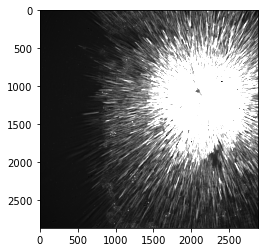

In [82]:
plt.figure()
plt.imshow(plot_ims[2],vmax=3000,vmin=0,cmap='gray')

In [93]:
fls_all = glob.glob(r'Y:\Glass_MERFISH\CGBB_ChrX_01_31_2023_Analysis\*--_Xh_RNAs.pkl')
len(fls_all)

322

In [91]:
fls[-1]

'Y:\\Glass_MERFISH\\CGBB_ChrX_01_31_2023_Analysis\\Conv_zscan__021--H25_Q73,74,75_C--_Xh_RNAs.pkl'

In [94]:
import napari
viewer = napari.Viewer()
icol=2
viewer.add_image(plot_ims[icol],contrast_limits=[0,3000])

Xh = Xhs[icol]
keep =Xh[:,-1]>3000
Xh = Xh[keep]
#X = Xh[:,:3]
#viewer.add_points(X,face_color=np.array([0,0,0,0]),edge_color='y',size=10)

keep = Xh[:,-2]<0.66
XhT = Xh[keep]
print(np.sum(keep))
#XhNT = Xh
X = XhT[:,1:3]

viewer.add_points(X,face_color=np.array([0,0,0,0]),edge_color='r',size=10)


keep = Xh[:,-2]>=0.66
XhT = Xh[keep]
#XhNT = Xh
X = XhT[:,1:3]
print(np.sum(keep))
viewer.add_points(X,face_color=np.array([0,0,0,0]),edge_color='g',size=10)



143890
1909


<Points layer 'X [1]' at 0x231b0a6f6a0>

In [21]:
!"{fls[2]}"